In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
plt.style.use('ggplot')

In [115]:
r = requests.get(url='https://www.mlssoccer.com/mls-is-back-tournament/standings') #using requests library to webscrape mls is back standings

In [116]:
soup = BeautifulSoup(r.text, features='html.parser')

In [117]:
table = soup.find_all('table', attrs={'class':"standings_table standings_rtp standings-future"})


In [118]:
#data-title = 'Club'
#data-title = 'Points'
#data-title = 'Points Per Game'
#data-title = 'Games Played'
#data-title = 'Wins'
#data-title = 'Losses'
#data-title = 'Ties'
#data-title = 'Losses'
#data-title = 'Goals For'
#data-title = 'Goals Against'
#data-title = 'Goal Difference'
#data-title = 'W-L-T'


titles = ['Club', 'Points', 'Points Per Game', 'Games Played', 
          'Wins', 'Losses', 'Ties', 'Losses', 'Goals For', 
          'Goals Against', 'Goal Difference']

In [119]:
lsts = []
for i in range(len(titles)):
    lsts.append([])
    

for i in range(len(table)):
    table_body = table[i]
    for index, x in enumerate(titles):
        for row in table_body.find_all(attrs={'data-title':x}):
            lsts[index].append(row.text)  

In [120]:
lsts[0]

['x - ORLOrlando City SC',
 'x - PHIPhiladelphia Union',
 'x - NYCNew York City FC',
 'MIAInter Miami CF',
 'x - SJSan Jose Earthquakes',
 'x - SEASeattle Sounders FC',
 'x - VANVancouver Whitecaps FC',
 'CHIChicago Fire FC',
 'x - TORToronto FC',
 'x - NENew England Revolution',
 'x - MTLMontreal Impact',
 'DCD.C. United',
 'x - SKCSporting Kansas City',
 'x - MINMinnesota United FC',
 'x - RSLReal Salt Lake',
 'COLColorado Rapids',
 'x - CLBColumbus Crew SC',
 'x - CINFC Cincinnati',
 'RBNYNew York Red Bulls',
 'ATLAtlanta United FC',
 'x - PORPortland Timbers',
 'x - LAFCLos Angeles Football Club',
 'HOUHouston Dynamo',
 'LALA Galaxy']

In [121]:
df = pd.DataFrame(data=lsts)

df = df.T

df.columns = titles

In [122]:
lst = []
lst2 = []
for i in range(df.shape[0]):
    if df['Club'][i].startswith('x'):
        lst.append(df['Club'][i][4:7])
        lst2.append(df['Club'][i][7:])
    else:
        lst.append(df['Club'][i][:3])
        lst2.append(df['Club'][i][3:])

In [123]:
df['Club'] = lst
df['Club Full Name'] = lst2

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Club             24 non-null     object
 1   Points           24 non-null     object
 2   Points Per Game  24 non-null     object
 3   Games Played     24 non-null     object
 4   Wins             24 non-null     object
 5   Losses           24 non-null     object
 6   Ties             24 non-null     object
 7   Losses           24 non-null     object
 8   Goals For        24 non-null     object
 9   Goals Against    24 non-null     object
 10  Goal Difference  24 non-null     object
 11  Club Full Name   24 non-null     object
dtypes: object(12)
memory usage: 2.4+ KB


In [125]:
for column in df.columns.values[3:11]:
    df[column] = df[column].astype(int)
    
df['Points'] = df['Points'].astype(int)
df['Points Per Game'] = df['Points Per Game'].astype(float)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Club             24 non-null     object 
 1   Points           24 non-null     int64  
 2   Points Per Game  24 non-null     float64
 3   Games Played     24 non-null     int64  
 4   Wins             24 non-null     int64  
 5   Losses           24 non-null     int64  
 6   Ties             24 non-null     int64  
 7   Losses           24 non-null     int64  
 8   Goals For        24 non-null     int64  
 9   Goals Against    24 non-null     int64  
 10  Goal Difference  24 non-null     int64  
 11  Club Full Name   24 non-null     object 
dtypes: float64(1), int64(9), object(2)
memory usage: 2.4+ KB


In [133]:
df.to_csv('../data/mlsisback_standings.csv')

In [128]:
goals_for = df.sort_values(by=['Goals For'], ascending=False).head(10)

In [129]:
goals_agst = df.sort_values(by=['Goals Against'], ascending=False).head(10)

In [131]:
clubs = np.array(['LAFC', 'CLB', 'ORL', 'TOR', 'POR', 'SKC', 'SJ', 'VAN', 'HOU',
       'PHI'])

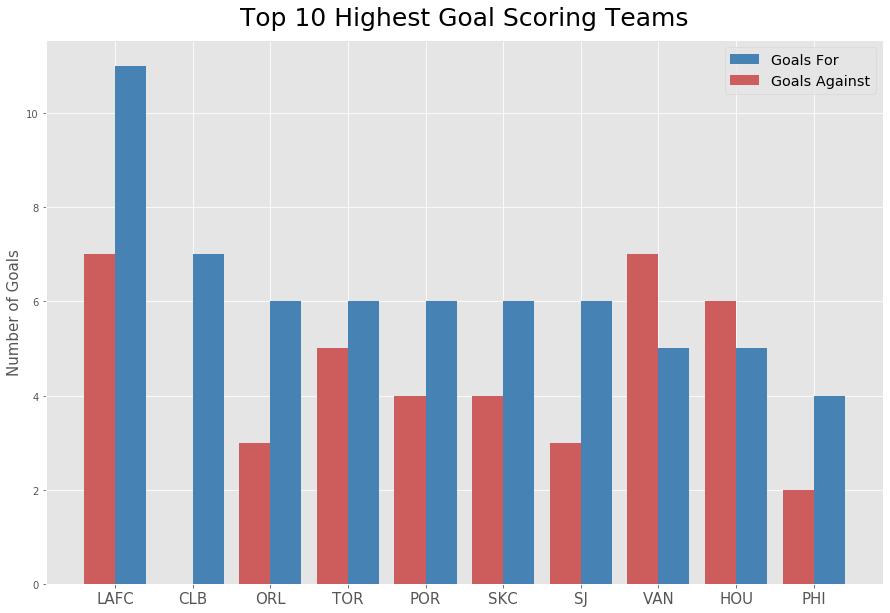

In [132]:
plt.figure(figsize=(15, 10))
plt.bar(np.arange(0.2, len(goals_for)), goals_for['Goals For'].values, width=0.4, label='Goals For', color='steelblue')
plt.bar(-0.2 + np.arange(len(goals_for)), goals_for['Goals Against'].values, width=0.4, label='Goals Against', color='indianred')
plt.xticks(ticks = np.arange(len(goals_for)), labels=clubs, size=15)
plt.ylabel('Number of Goals', size=15)
plt.legend(fontsize='x-large')
plt.title('Top 10 Highest Goal Scoring Teams', size=25, pad=15)
plt.savefig('../selecting_lafc.png', dpi=100)

# Intuition around choosing LAFC 

I chose LAFC as the team to analyze because after observing the standings from MLS is back, I was suprised to find that LAFC has the largest Goals For and the second highest goals against for the tournament. 

They had 4 goals **more** than the next highest opponent, but still had a large number of goals against. Based on my domain knowledge and intuition I think LAFC could use a position change somewhere on the field to try to balance this statistic. 

Another interesting note is that with those numbers the team still went 1-0-2. 

# Game Schedule and Results MLS is Back 2020

1. 7/13 Houston Dash vs LA FC - Final Score 3-3

2. 7/18 LAFC vs LA Galaxy - Final Score 6-2

3. 7/23 LAFC vs Portland - Final Score 2-2

4. 7/27 Seattle vs LAFC - Final Score 1-4

5. 7/31 LAFC vs ORL - Final Score 1-1, PK's 4-5

### 1. HOU vs LAFC

Goal #1: Gave up initial goal to Houston in 8th minute, defensive error. LAFC player jumped at a fake shot, Houston continued to dribble and took shot outside of 18 on left side of the field **Shot**

Goal #2: Gave up goal off of counter attack in 29th minute, long ball into LAFC's final third and long cross into pk spot and gave up volley goal. Long late runner into box, #27 left back mark. **CROSS - volley**

Goal #3: Gave up goal in 49th minute of 1st half. Set piece on left flank, ball into the box unchallenged header goal. **CROSS - header**

### 2. LAFC vs LA Galaxy

Goal #1: Gave up inital goal in the 4th minute. Poor defensive clearance and defensive error resulting in Galazy player dribbling towards goal, playing ball back towards defenders running towards goal to give up own goal in 6 yard box. **Own Goal**

Goal #2: Gave up Pen in 27th minute, ball trickling across edge of 18 yard box and LAFC defender sticks foot out and trips Galaxy player.  **Pen**

Note: No problem scoring goals in this game, some excellent combining and eagerness in the final third for LAFC

### 3. LAFC vs Portland

Goal #1: Gave up inital goal in the 6th minute. **Huge** defensive error, left back was shifted all of the way to the right side, leaving huge hole in middle of the field around half. **Shot**

Goal #2: Goal given up in 81st minute of play. Intial corner kick, ball is won by Portland and headed back up by LAFC, won by Portland again and headed back to teammate who finds header back of the net. **Loose ball in box - header**

### 4. Seattle vs LAFC

Goal #1: Gave up only goal in 75th minute. Long cross from left flank on the dribble, finds farthest right defender on a half volley goal. Nice curved ball into the box that no LAFC defenders could get to. **CROSS - half volley** 

### 5. LAFC vs ORL

Goal #1: Gave up goal in 89th minute off of corner kick. Ball into back post, late runner and defender one step behind attacker. Header goal scored on the inside of the Goal area. **CROSS - header**

# Final Position Choice

Looking to find a centerback. Based on where the shots are taken for the goals LAFC has given up for the 2020 MLS is Back Tournament, LAFC needs a strong defender, preferably a **centerback** that can organize teammates, win the aerial battle in the defensive third, and mak big stops in the penalty box. 

Out of the 9 goals given up for LAFC, 8 of them were within the penalty box, and 5 of them within 12 yards from goal. 

5 out of 9 goals were aerial goals, headers or volleys withing the penalty box. 



# Centerback

Based on intuition and from watching LAFC film these are the metrics by which a center back should be chosen to aid LAFC in the CB position:

* Experience (several years playing professionally, with large number of playing time)
* Commanding defender (need a leader willing to win the aerial battle and organize and communicate with goalkeeper and teammates in the defensive third)
* Most likely from a team that gives up little to no goals

**Note**: Choosing CB's can be very difficult due to the lack of statistics provided in the CB position. Goals are to filter teams that have success defensively and also filter years of experience to find top 3 picks. 

**Note**: I have experience with the Centerback position and understand it fully to be able to know the metrics which make a successful Centerback. Obviously a single position change cannot bring LAFC's Goals Against to 0, but it could move to start to change the culture around conceeding goals especially in the penalty area in front of goal

## Top 4 teams to look at their CB's

* Orlando 
* Columbus Crew
* Philedelphia
* San Jose

Very impressed with https://www.americansocceranalysis.com/home/2017/3/6/validating-the-asa-xgoals-model and potentially given more time I would have liked to come up with my own metric for defenders, and based on defender field positioning, proximity to attacker, and other instances I would come up with a way to evaluate a defenders performance. 